<a href="https://colab.research.google.com/github/mugdha711/MLAP-Class/blob/master/july_25_basic_stats%20and%20visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
auto=pd.read_csv('/content/Auto.csv', sep=',') #if working from desktop then (r'D:\bb\bhh')
#r - use- because python understand either '/' or '\\' slashes so use r (means rar)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
#for string walue python assigns object

auto['mpg'].describe()

count    397.000000
mean      23.515869
std        7.825804
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [5]:
auto[['mpg','cylinders','displacement','horsepower','weight', 'acceleration' ]].describe()

,mpg,cylinders,displacement,weight,acceleration
count,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668
std,7.825804,1.701577,104.379583,847.904119,2.749995
min,9.000000,3.000000,68.000000,1613.000000,8.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000
max,46.600000,8.000000,455.000000,5140.000000,24.800000


In [6]:
#horsepower not an object tell python
auto['horsepower'].isnull().values.any()

False

In [10]:
auto["horsepower"] = pd.to_numeric( auto["horsepower"], errors = 'coerce' )

In [13]:
#if want to drop values that are null or blank
auto=auto.dropna()

In [14]:
auto[['mpg','cylinders','displacement','horsepower','weight', 'acceleration' ]].describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


In [15]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


# seaborn and mathplot lib- visualization

In [16]:
# %matplotlib inline is a directive to the ipython notebook to render the plots here.
get_ipython().magic('matplotlib inline')
import seaborn as sn
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
mpg_cylinders_df = auto.groupby('cylinders')['mpg'].mean().reset_index()


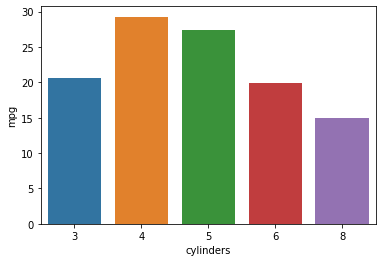

In [20]:
sn.barplot( y = 'mpg',
          x = 'cylinders',
          data = mpg_cylinders_df ) #understand how cylinders related to miles pr gallon


In [21]:
#we found that vehicles with 4 cylinder have more mpg

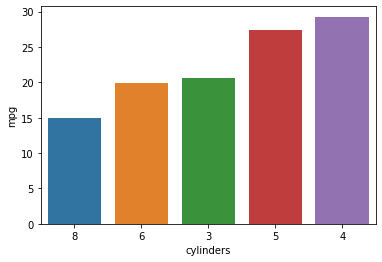

In [25]:
sn.barplot(y='mpg',
          x='cylinders',
          data=mpg_cylinders_df,
          order=mpg_cylinders_df.sort_values('mpg')['cylinders'])

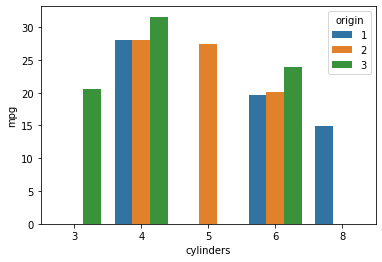

In [28]:
mpg_cylinders_origin_df = auto.groupby(['cylinders', 'origin'])['mpg'].mean().reset_index()
sn.barplot( y = 'mpg',
          x = 'cylinders',
          data = mpg_cylinders_origin_df,
          hue = 'origin');

In [30]:
mpg_year_origin_df = auto.groupby(['year', 'origin'])['mpg'].mean().reset_index()

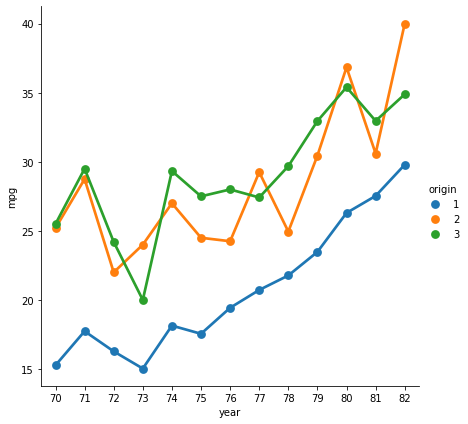

In [33]:
#hue - for colour
sn.catplot( x = 'year', y = 'mpg', hue = 'origin', kind = 'point', data = mpg_year_origin_df, height = 6 )
#scatter plot

In [ ]:
#1-us, 2-europ, 3-japan
#insight - over periiod of time , us mostly on speed than miles pr gallon, europe increases and decreases in terms of mileage and now they have topped the list, followed by japan